<a href="https://colab.research.google.com/github/akankshaUniyal20/Covid-Detection/blob/main/SkinCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_csv = "/content/drive/My Drive/SkinCancer/HAM10000_metadata.csv"
imgs_path = "/content/drive/My Drive/SkinCancer/Skin Cancer"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense , Conv2D, MaxPool2D , Flatten , Dropout
import keras
import os

In [ ]:
df = pd.read_csv(file_csv)

In [ ]:
df.drop(['lesion_id','dx_type','age','sex','localization'],axis = 1,inplace = True)
df.head(5)

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl


In [ ]:
df.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [ ]:
le = LabelEncoder()
df['dx'] = le.fit_transform(df.dx)
df.dx.value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: dx, dtype: int64

In [ ]:
dir = imgs_path
id = [x.split('.')[0] for x in os.listdir(dir)]
image_path = {x:os.path.join(dir,f'{x}.jpg') for x in id}

In [ ]:
len(image_path)

10015

In [ ]:
df['path'] = df.image_id.map(image_path.get)
df.head()

,image_id,dx,path
0,ISIC_0027419,2,/content/drive/My Drive/SkinCancer/Skin Cancer...
1,ISIC_0025030,2,/content/drive/My Drive/SkinCancer/Skin Cancer...
2,ISIC_0026769,2,/content/drive/My Drive/SkinCancer/Skin Cancer...
3,ISIC_0025661,2,/content/drive/My Drive/SkinCancer/Skin Cancer...
4,ISIC_0031633,2,/content/drive/My Drive/SkinCancer/Skin Cancer...


In [ ]:
import cv2

In [ ]:
images = []
paths=df['path']
for i in np.arange(len(paths)):
    images.append(cv2.cvtColor(plt.imread(paths[i]),cv2.COLOR_BGR2GRAY))

np.array(images).shape

(10015, 450, 600)

In [ ]:
data = pd.concat([df['path'],df['dx']],axis =1)

In [ ]:
data.head(5)

,path,dx
0,/content/drive/My Drive/SkinCancer/Skin Cancer...,2
1,/content/drive/My Drive/SkinCancer/Skin Cancer...,2
2,/content/drive/My Drive/SkinCancer/Skin Cancer...,2
3,/content/drive/My Drive/SkinCancer/Skin Cancer...,2
4,/content/drive/My Drive/SkinCancer/Skin Cancer...,2


In [ ]:
label = {0:'Actinic Keratoses',1:'basal',2:'benign',3:'dermatofibroma',4:'melanoma',5:'melanocytic nevi',6:'vascular lesions'}
#data['dx'].replace(label, inplace=True)
data.head(5)

,path,dx
0,/content/drive/My Drive/SkinCancer/Skin Cancer...,2
1,/content/drive/My Drive/SkinCancer/Skin Cancer...,2
2,/content/drive/My Drive/SkinCancer/Skin Cancer...,2
3,/content/drive/My Drive/SkinCancer/Skin Cancer...,2
4,/content/drive/My Drive/SkinCancer/Skin Cancer...,2


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

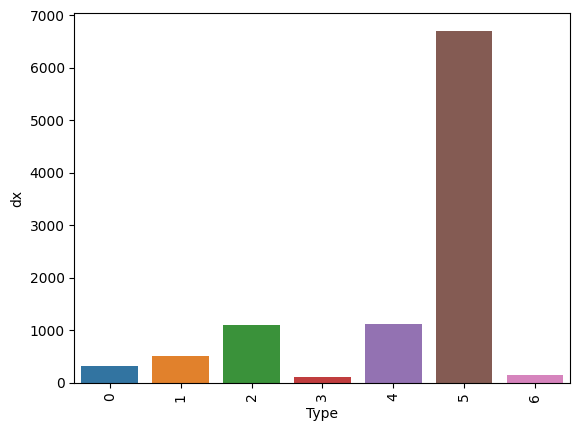

In [ ]:
#plotting bar graph of data to measure the count of images
counts = data.dx.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [ ]:
from PIL import Image

In [ ]:
# Adding image pixels
data['image_pixel'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((28,28))))

In [ ]:
data.head()

,path,dx,image_pixel
0,/content/drive/My Drive/SkinCancer/Skin Cancer...,2,"[[[192, 153, 193], [195, 155, 192], [197, 154,..."
1,/content/drive/My Drive/SkinCancer/Skin Cancer...,2,"[[[27, 16, 32], [69, 49, 76], [122, 93, 126], ..."
2,/content/drive/My Drive/SkinCancer/Skin Cancer...,2,"[[[192, 138, 153], [200, 144, 162], [202, 142,..."
3,/content/drive/My Drive/SkinCancer/Skin Cancer...,2,"[[[40, 21, 31], [95, 61, 73], [143, 102, 118],..."
4,/content/drive/My Drive/SkinCancer/Skin Cancer...,2,"[[[159, 114, 140], [194, 144, 173], [215, 162,..."


In [ ]:
img_pix = data['image_pixel']

In [ ]:
img_pix

0        [[[192, 153, 193], [195, 155, 192], [197, 154,...
1        [[[27, 16, 32], [69, 49, 76], [122, 93, 126], ...
2        [[[192, 138, 153], [200, 144, 162], [202, 142,...
3        [[[40, 21, 31], [95, 61, 73], [143, 102, 118],...
4        [[[159, 114, 140], [194, 144, 173], [215, 162,...
                               ...                        
10010    [[[183, 166, 182], [183, 165, 181], [184, 167,...
10011    [[[3, 4, 2], [41, 36, 35], [119, 103, 102], [1...
10012    [[[134, 120, 120], [166, 148, 149], [175, 155,...
10013    [[[160, 124, 145], [164, 131, 151], [166, 127,...
10014    [[[175, 142, 121], [180, 149, 133], [181, 149,...
Name: image_pixel, Length: 10015, dtype: object

In [ ]:
img_pix.shape

(10015,)

In [ ]:
image_array = np.array(img_pix.tolist())

In [ ]:
image_array.shape

(10015, 28, 28, 3)

In [ ]:
img_label = data['dx']

In [ ]:
image_pixels_2d = image_array.reshape(image_array.shape[0], -1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
df_x,df_y = ros.fit_resample(image_pixels_2d, img_label)

In [ ]:
df_x.shape

(46935, 2352)

In [ ]:
df_x= np.array(df_x).reshape(-1,28,28,3)

In [ ]:
df_x.shape

(46935, 28, 28, 3)

In [ ]:
train=df_x
test=df_y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_x,df_y, test_size=0.20, random_state=1)

In [ ]:
np_x_train = np.array(X_train)
np_x_test = np.array(X_test)
np_x_train.shape
np_x_test.shape

(9387, 28, 28, 3)

In [ ]:
X_train = np.array(np_x_train).reshape(-1,28, 28,3)
X_test = np.array(np_x_test).reshape(-1,28, 28,3)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
print("training",X_train.shape)
print(Y_train.shape)
print("testing",X_test.shape)
print(Y_test.shape)

training (37548, 28, 28, 3)
(37548,)
testing (9387, 28, 28, 3)
(9387,)


In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train,Y_train, test_size=0.1, random_state=1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
train_images = datagen.flow(X_train, Y_train, batch_size=32)


In [ ]:
data_gen2= ImageDataGenerator()

In [ ]:
text_images = data_gen2.flow(X_test, Y_test, batch_size=32)

In [ ]:
valid_images = data_gen2.flow(X_valid, Y_valid, batch_size=32)

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)        

In [ ]:
from tensorflow.keras.callbacks import Callback,EarlyStopping

In [ ]:
my_callbacks = [EarlyStopping(monitor = 'val_accuracy',min_delta=0,patience=2,mode='auto')]

In [ ]:
history = model.fit(train_images, epochs=80, validation_data=valid_images,callbacks=my_callbacks)


Epoch 1/80
1057/1057 [==============================] - 51s 47ms/step - loss: 1.4606 - accuracy: 0.4810 - val_loss: 0.9226 - val_accuracy: 0.6636
Epoch 2/80
1057/1057 [==============================] - 54s 51ms/step - loss: 0.7951 - accuracy: 0.7028 - val_loss: 0.5479 - val_accuracy: 0.7984
Epoch 3/80
1057/1057 [==============================] - 48s 46ms/step - loss: 0.4949 - accuracy: 0.8167 - val_loss: 0.4185 - val_accuracy: 0.8445
Epoch 4/80
1057/1057 [==============================] - 48s 45ms/step - loss: 0.3937 - accuracy: 0.8559 - val_loss: 0.3677 - val_accuracy: 0.8623
Epoch 5/80
1057/1057 [==============================] - 47s 44ms/step - loss: 0.2873 - accuracy: 0.8952 - val_loss: 0.2291 - val_accuracy: 0.9193
Epoch 6/80
1057/1057 [==============================] - 47s 45ms/step - loss: 0.2571 - accuracy: 0.9071 - val_loss: 0.2926 - val_accuracy: 0.8961
Epoch 7/80
1057/1057 [==============================] - 48s 45ms/step - loss: 0.2004 - accuracy: 0.9283 - val_loss: 0.1869 -

In [ ]:
model.evaluate(text_images)

294/294 [==============================] - 4s 13ms/step - loss: 0.2306 - accuracy: 0.9188


[0.2305620163679123, 0.9188238978385925]

In [ ]:
model.save('skin_model_1.h5')

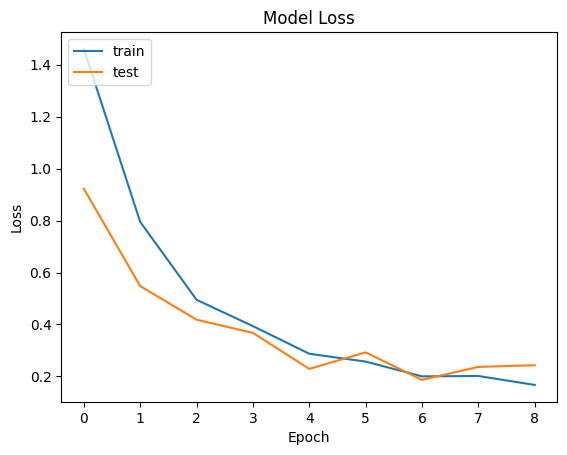

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

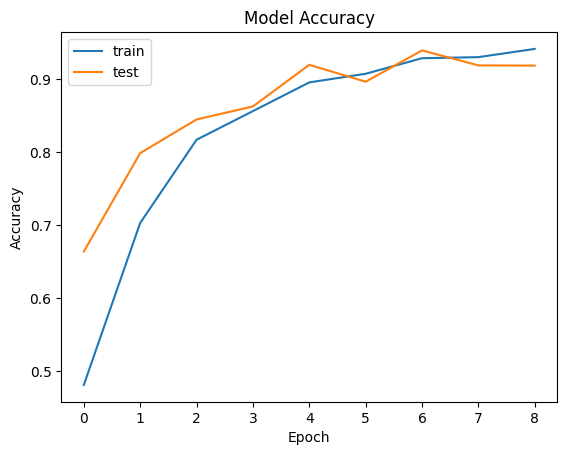

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()